# SENG474 - Assignment 1

## Data Preprocessing

This section covers loading the dataset, splitting it into training and test sets, and applying Min-Max scaling to normalize the features. This is in line with the preprocessing suggestions in Appendix A of the assignment.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = 'spambase_augmented.csv'
data = pd.read_csv(file_path)

# Split into features (X) and target (y)
X = data.drop(columns=['1'])  # Drop the target column to get features
y = data['1']  # Extract the target column

# Shuffle and Split into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling to the test data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames (optional, for better readability)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the first few rows of the scaled training and test sets
print("First few rows of scaled training features:")
print(X_train_scaled.head())

print("\nFirst few rows of scaled test features:")
print(X_test_scaled.head())

First few rows of scaled training features:
   0.000  0.640  0.640.1  0.000.1  0.320   0.000.2   0.000.3  0.000.4  \
0    0.0    0.0      0.0      0.0  0.000  0.000000  0.000000  0.00000   
1    0.0    0.0      0.0      0.0  0.000  0.000000  0.000000  0.09991   
2    0.0    0.0      0.0      0.0  0.000  0.000000  0.000000  0.00000   
3    0.0    0.0      0.0      0.0  0.000  0.000000  0.000000  0.00000   
4    0.0    0.0      0.0      0.0  0.136  0.076531  0.061898  0.00000   

   0.000.5  0.000.6  ...  0.000.815  0.000.816  0.000.817  0.000.818  \
0      0.0      0.0  ...   0.000000      0.357        0.0        0.0   
1      0.0      0.0  ...   0.051821      0.000        0.0        0.0   
2      0.0      0.0  ...   0.000000      0.000        0.0        0.0   
3      0.0      0.0  ...   0.000000      0.000        0.0        0.0   
4      0.0      0.0  ...   0.000000      0.000        0.0        0.0   

   0.000.819  0.000.820  0.000.821  0.000.822  0.000.823  0.000.824  
0   0.333333  

---

## Decision trees

### Decision Tree Implementation

This section implements a decision tree classifier and evaluates its performance on the training and test sets. The tree is visualized, and the training and test errors are calculated.

Training Error: 0.0005434782608695343
Test Error: 0.08804347826086956


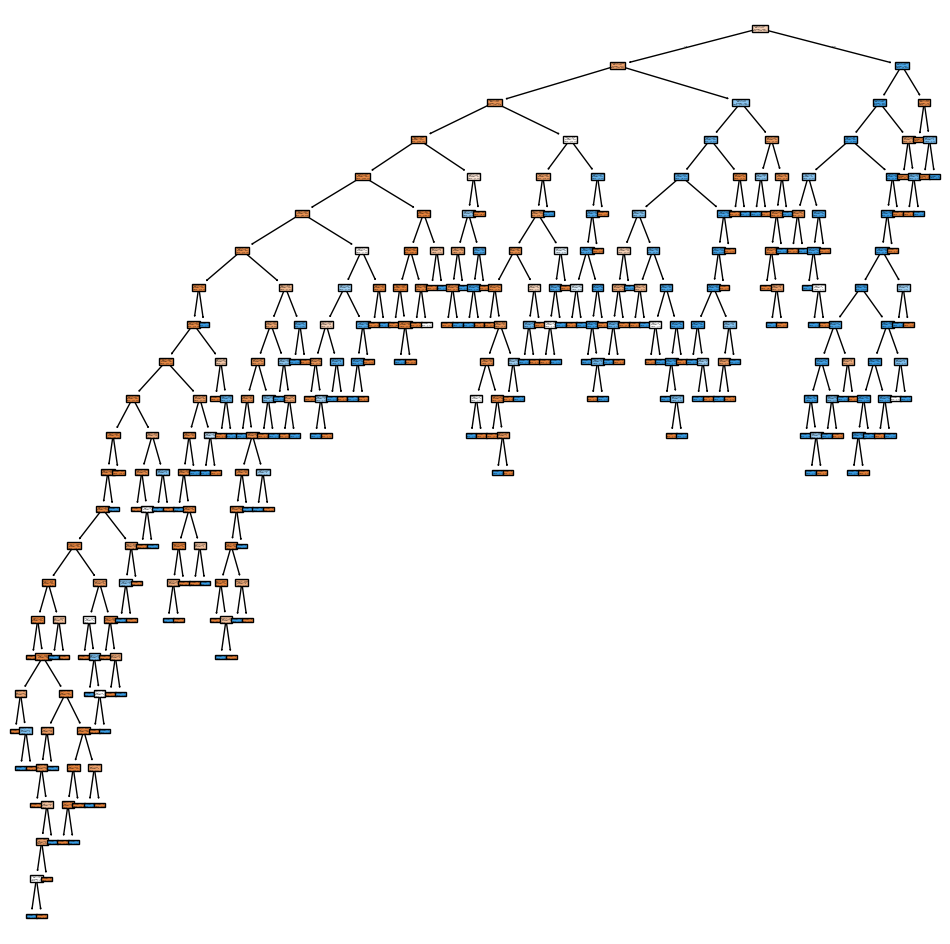

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Initialize, fit to test data
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)  # Fit to data

# Initial training, test error
print("Training Error:", 1-accuracy_score(y_train, tree.predict(X_train)))
print("Test Error:", 1-accuracy_score(y_test, tree.predict(X_test)))

# Plot the decision tree
plt.figure(figsize=(12, 12))
plot_tree(tree, filled=True)

# Optional (for report)
# plt.savefig('images/decision_tree_base.png')

plt.show()

### Decision Tree Depth Analysis

This section analyzes the effect of varying the maximum depth of the decision tree on training and test errors. The optimal depth is identified based on the minimum test error.

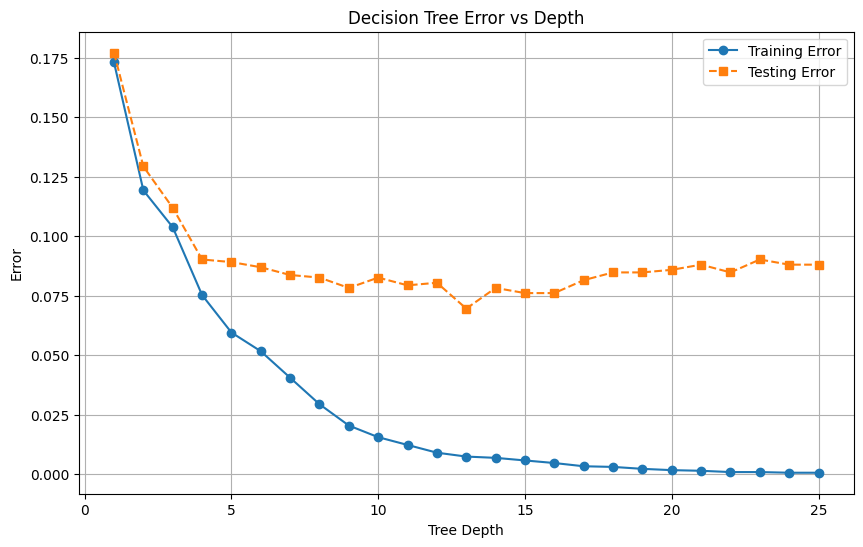

Optimal depth: 13, Min error: 0.06956521739130439


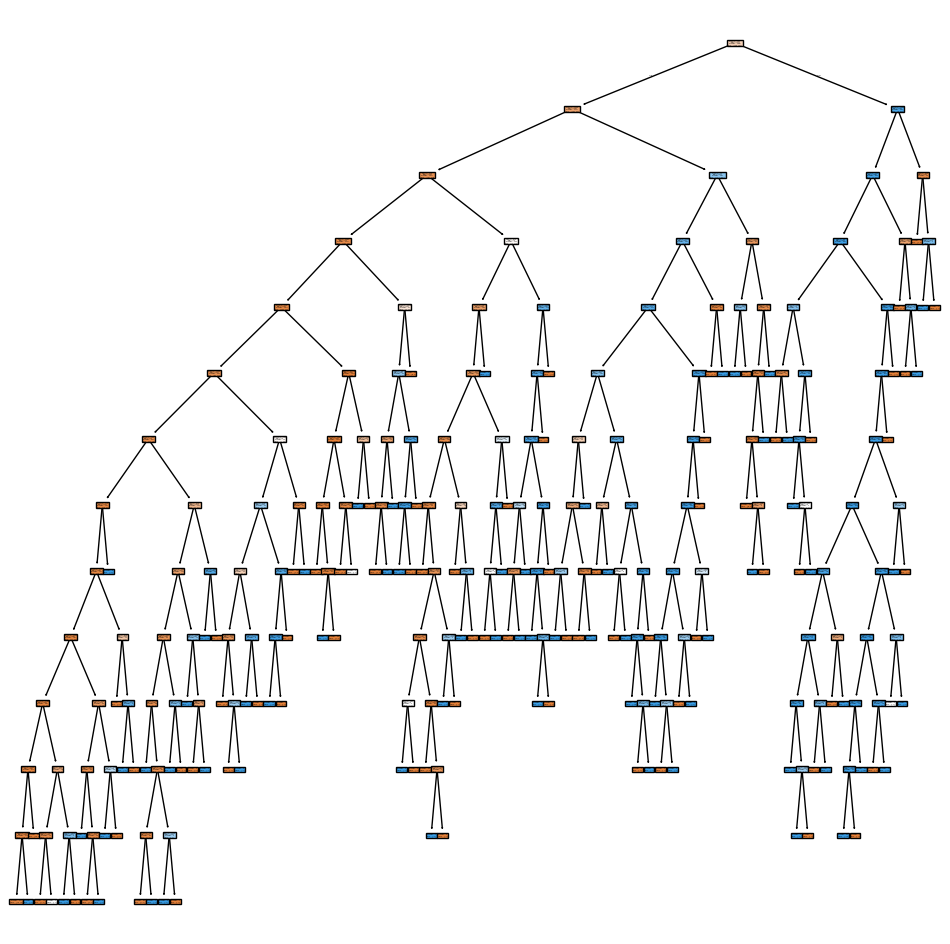

In [6]:
depths = list(range(1, 26))  # List of depths to test
err_train = []  # Training error
err_test = []  # Test error

for depth in depths:
    # Initialize and fit the decision tree
    dtree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dtree.fit(X_train, y_train)
    
    # Store error in arrays
    err_train.append(1-accuracy_score(y_train, dtree.predict(X_train)))
    err_test.append(1-accuracy_score(y_test, dtree.predict(X_test)))

# Plot accuracy vs. depth
plt.figure(figsize=(10, 6))
plt.plot(depths, err_train, marker='o', label="Training Error", linestyle='-')
plt.plot(depths, err_test, marker='s', label="Testing Error", linestyle='--')

# Formatting
plt.xlabel("Tree Depth")
plt.ylabel("Error")
plt.title("Decision Tree Error vs Depth")
plt.legend()
plt.grid(True)

# Optional (for report)
# plt.savefig('images/decision_tree_err_vs_depth.png')

plt.show()

# Find the optimal depth
min_err = min(err_test)  # Find the minimum error
opt_depth = err_test.index(min_err) + 1  # Find optimal depth; index + 1
print(f"Optimal depth: {opt_depth}, Min error: {min_err}")

# Plot optimal tree
tree=DecisionTreeClassifier(max_depth=opt_depth, random_state=42)
tree.fit(X_train, y_train)
plt.figure(figsize=(12, 12))
plot_tree(tree, filled=True)

# Optional (for report)
# plt.savefig('images/decision_tree_opt_depth.png')

plt.show()

### Decision Tree Pruning Analysis

This section explores the effect of cost-complexity pruning on the decision tree. The optimal pruning parameter (alpha) is identified based on the minimum test error.

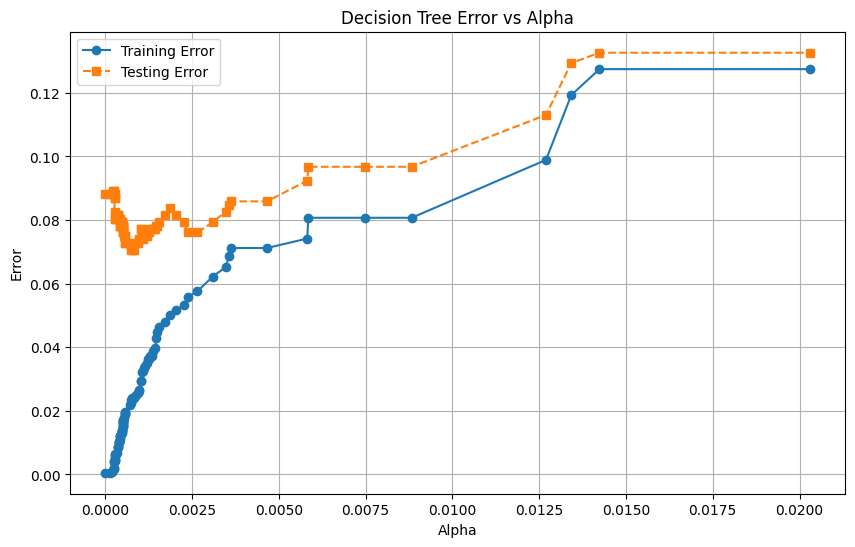

Optimal alpha: 0.0007340144627479225, Min Error: 0.07065217391304346


In [9]:
# Get the cost-complexity pruning path
path = tree.cost_complexity_pruning_path(X_train, y_train)
alphas = path.ccp_alphas  # All possible ccp_alpha values

err_train = []  # Training error
err_test = []  # Test error

for alpha in alphas:
    # Initialize and fit the decision tree
    atree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    atree.fit(X_train, y_train)
    
    # Store error in arrays
    err_train.append(1-accuracy_score(y_train, atree.predict(X_train)))
    err_test.append(1-accuracy_score(y_test, atree.predict(X_test)))

# Exclude extreme values (the limit was determined through testing,
# outliers and increasing error past alpha = 0.02)
filtered_alphas = [a for a in alphas if a < 0.025] 

# Plot accuracy vs. alpha
plt.figure(figsize=(10, 6))
plt.plot(filtered_alphas, err_train[:len(filtered_alphas)], marker='o', label="Training Error", linestyle='-')
plt.plot(filtered_alphas, err_test[:len(filtered_alphas)], marker='s', label="Testing Error", linestyle='--')

# Formatting
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.title("Decision Tree Error vs Alpha")
plt.legend()
plt.grid(True)

# Optional (for report)
plt.savefig('images/decision_tree_err_vs_alpha.png')

plt.show()

# Find the optimal alpha
min_err = min(err_test)  # Find the minimum error
opt_alpha_i = err_test.index(min_err)  # Find optimal alpha index
opt_alpha = alphas[opt_alpha_i]
print(f"Optimal alpha: {opt_alpha}, Min Error: {min_err}")

### Learning Curves for Decision Trees

This section analyzes the learning curves for decision trees by varying the training set size. The goal is to understand how the model's performance changes as more data is used for training.

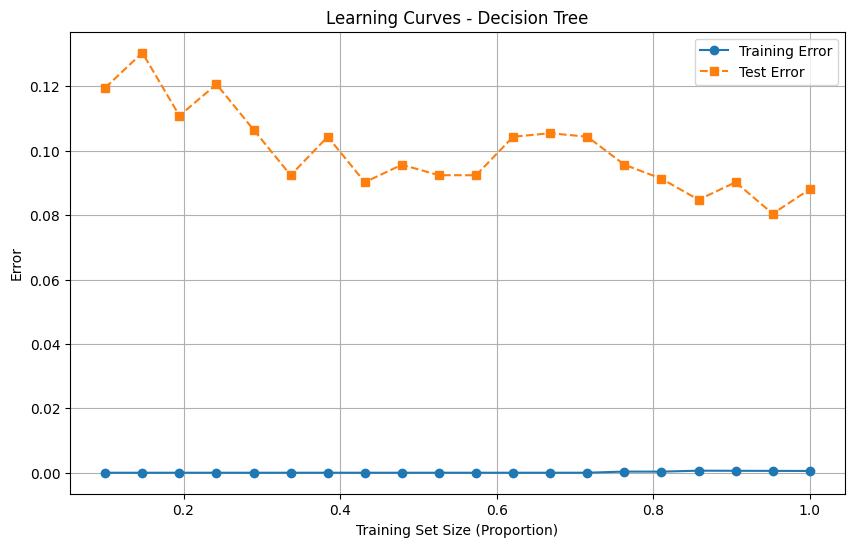

Optimal training size: 0.95, Minimum error: 0.0804


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create array of training set sizes
train_sizes = np.linspace(0.1, 1.0, 20)  # From 10% to 100% in 20 steps

err_train = []
err_test = []

for size in train_sizes:
    # Calculate how many samples to use for this training size
    n_samples = int(len(X_train) * size)
    
    # Use partial training data
    X_partial = X_train[:n_samples]
    y_partial = y_train[:n_samples]
    
    # Initialize and fit the decision tree
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_partial, y_partial)
    
    # Calculate accuracies
    err_train.append(1-accuracy_score(y_partial, tree.predict(X_partial)))
    err_test.append(1-accuracy_score(y_test, tree.predict(X_test)))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, err_train, marker='o', label="Training Error", linestyle='-')
plt.plot(train_sizes, err_test, marker='s', label="Test Error", linestyle='--')

plt.xlabel("Training Set Size (Proportion)")
plt.ylabel("Error")
plt.title("Learning Curves - Decision Tree")
plt.legend()
plt.grid(True)

# Optional (for report)
plt.savefig('images/decision_tree_curve.png')

plt.show()

# Find the optimal training set size based on minimum test error
min_err = min(err_test)  # Minimum test error
optimal_size_index = err_test.index(min_err)  # Index of minimum error
optimal_train_size = train_sizes[optimal_size_index]  # Corresponding training size

print(f"Optimal training size: {optimal_train_size:.2f}, Minimum error: {min_err:.4f}")

---

### Random Forest Implementation

This section implements a random forest classifier and evaluates its performance on the training and test sets. The effect of varying the number of trees in the forest is analyzed.

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize, fit to test data
forest=RandomForestClassifier(random_state=42)

forest.fit(X_train, y_train) # Fit to data

# Initial training, test error
print(1-accuracy_score(y_train, forest.predict(X_train)))
print(1-accuracy_score(y_test, forest.predict(X_test)))


0.0005434782608695343
0.06521739130434778


### Random Forest Sizes Analysis

This section analyzes the effect of varying the number of trees (ensemble size) in a random forest on training and test errors. The goal is to find the optimal number of trees that minimizes the test error.

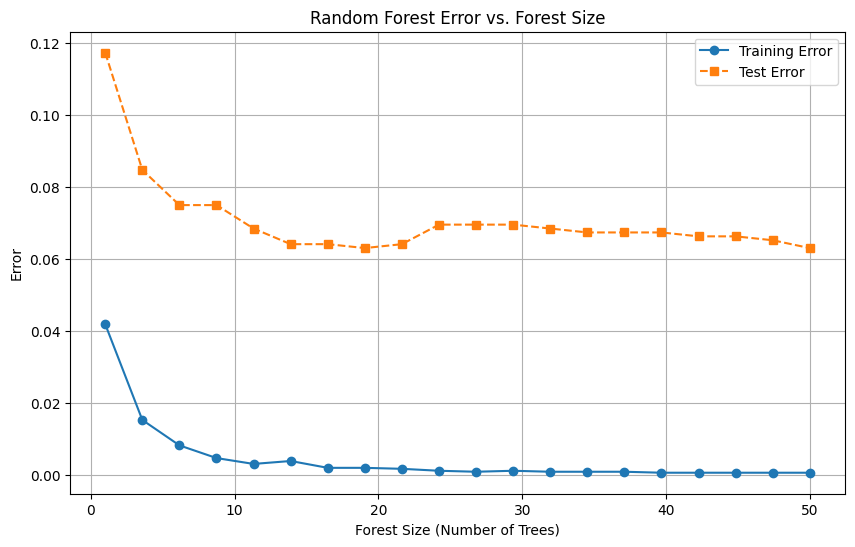

Minimum Test Error:  0.06304347826086953 at Forest Size: 19


In [44]:
# Create array of forest sizes (number of trees)
forest_sizes = np.linspace(1, 50, 20)  # From 1 to 50 trees in 20 steps

err_train = []  # Training error
err_test = []   # Test error

for size in forest_sizes:
    # Initialize and fit the random forest
    forest = RandomForestClassifier(random_state=42, n_estimators=int(size))
    forest.fit(X_train, y_train)
    
    # Store error in arrays
    err_train.append(1-accuracy_score(y_train, forest.predict(X_train)))
    err_test.append(1-accuracy_score(y_test, forest.predict(X_test)))

# Plot accuracy vs. forest size
plt.figure(figsize=(10, 6))
plt.plot(forest_sizes, err_train, marker='o', label="Training Error", linestyle='-')
plt.plot(forest_sizes, err_test, marker='s', label="Test Error", linestyle='--')

plt.xlabel("Forest Size (Number of Trees)")
plt.ylabel("Error")
plt.title("Random Forest Error vs. Forest Size")
plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('images/random_forest_err_vs_size.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Find the optimal forest size
min_value, min_index = min((value, index) for index, value in enumerate(err_test))
print("Minimum Test Error: ", min_value, "at Forest Size:", int(forest_sizes[min_index]))

### Random Forest Feature Analysis

This section analyzes the effect of varying the number of features used in each split of the random forest. The goal is to find the optimal number of features that minimizes the test error.

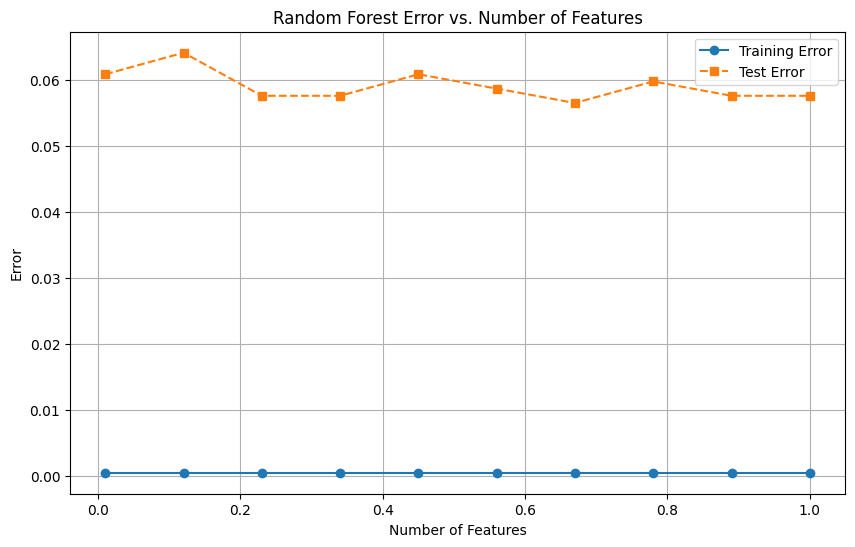

Min error:  0.05652173913043479 at size 0.67


In [28]:
# Create array of feature sizes (proportion of features to use)
feature_sizes = np.linspace(0.01, 1, 10)  # From 1% to 100% in 10 steps

train_scores = []
test_scores = []

for size in feature_sizes:
    # Initialize and fit the random forest
    forest = RandomForestClassifier(random_state=42, max_features=size)
    forest.fit(X_train, y_train)
    
    # Store error in arrays
    train_scores.append(1 - accuracy_score(y_train, forest.predict(X_train)))
    test_scores.append(1 - accuracy_score(y_test, forest.predict(X_test)))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(feature_sizes, train_scores, marker='o', label="Training Error", linestyle='-')
plt.plot(feature_sizes, test_scores, marker='s', label="Test Error", linestyle='--')

plt.xlabel("Number of Features")
plt.ylabel("Error")
plt.title("Random Forest Error vs. Number of Features")
plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('images/random_forest_err_vs_features.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Find the optimal number of features
min_value, min_index = min((value, index) for index, value in enumerate(test_scores))
print("Min error: ", min_value, "at size", feature_sizes[min_index])

### Learning Curves for Random Forests

This section analyzes the learning curves for random forests by varying the training set size. The goal is to understand how the model's performance changes as more data is used for training.

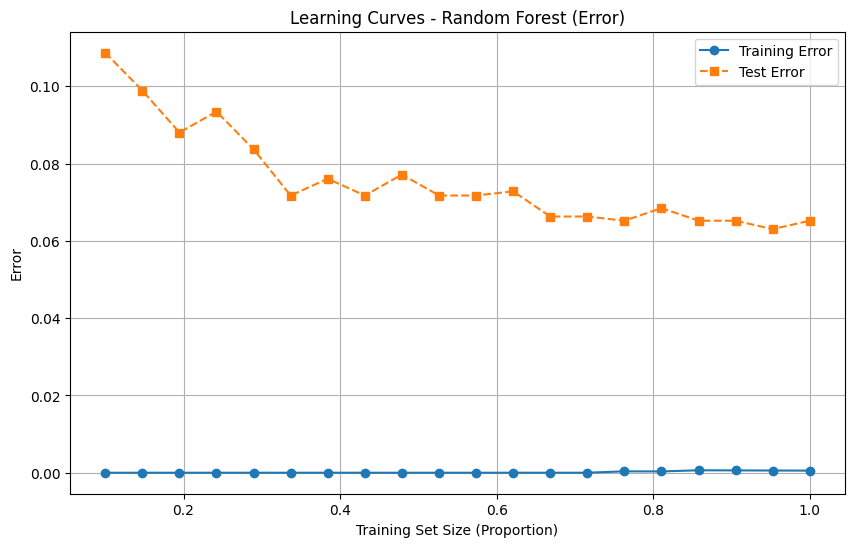

Minimum Test Error:  0.06304347826086953 at size 0.9526315789473684


In [31]:
# Create array of training set sizes
train_sizes = np.linspace(0.1, 1.0, 20)  # From 10% to 100% in 20 steps

train_scores = []
test_scores = []

# Create array of training set sizes
train_sizes = np.linspace(0.1, 1.0, 20)  # From 10% to 100% in 20 steps

train_errors = []  # Training error
test_errors = []   # Test error

for size in train_sizes:
    # Calculate how many samples to use for this training size
    n_samples = int(len(X_train) * size)
    
    # Use partial training data
    X_partial = X_train[:n_samples]
    y_partial = y_train[:n_samples]
    
    # Initialize and fit the random forest
    forest = RandomForestClassifier(random_state=42)
    forest.fit(X_partial, y_partial)
    
    # Calculate errors (1 - accuracy)
    train_error = 1-accuracy_score(y_partial, forest.predict(X_partial))
    test_error = 1-accuracy_score(y_test, forest.predict(X_test))
    
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, marker='o', label="Training Error", linestyle='-')
plt.plot(train_sizes, test_errors, marker='s', label="Test Error", linestyle='--')

plt.xlabel("Training Set Size (Proportion)")
plt.ylabel("Error")
plt.title("Learning Curves - Random Forest (Error)")
plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('images/random_forest_curve.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Find the optimal training set size based on minimum test error
min_value, min_index = min((value, index) for index, value in enumerate(test_errors))
print("Minimum Test Error: ", min_value, "at size", train_sizes[min_index])

---

### AdaBoost Implementation

This section implements an AdaBoost classifier with decision stumps (max_depth=1) as the base estimator. The training and test errors are calculated and printed.

In [32]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost with decision stumps (max_depth=1)
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Fit the AdaBoost model to the training data
adaboost.fit(X_train, y_train)

# Calculate training and test errors (1 - accuracy)
train_error = 1-accuracy_score(y_train, adaboost.predict(X_train))
test_error = 1-accuracy_score(y_test, adaboost.predict(X_test))

# Print errors
print(f"Training Error: {train_error:.4f}")
print(f"Test Error: {test_error:.4f}")

Training Error: 0.0533
Test Error: 0.0793


### AdaBoost Iterations Analysis

This section analyzes the effect of varying the number of iterations (weak hypotheses) in AdaBoost on training and test errors. The goal is to find the optimal number of iterations that minimizes the test error.

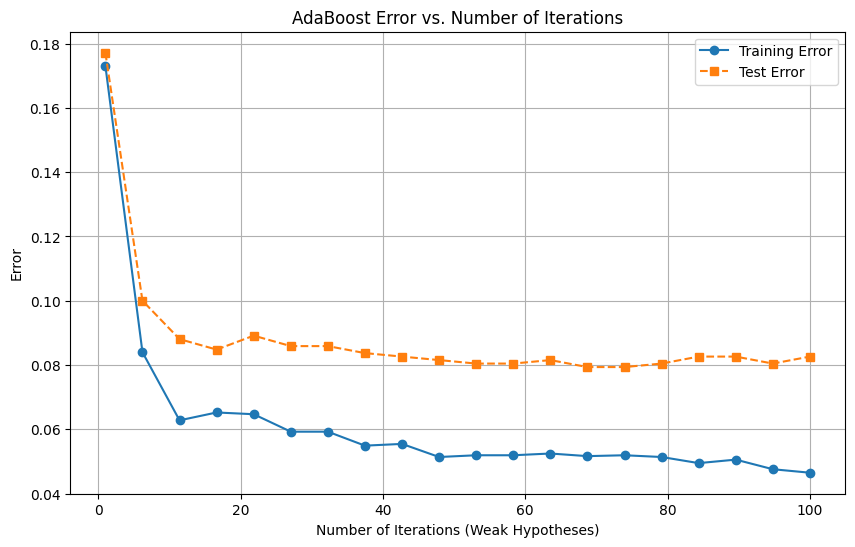

Minimum Test Error: 0.0793 at 68 iterations


In [33]:
# Define the range of iterations (number of weak hypotheses)
num_estimators = np.linspace(1, 100, 20)  # From 1 to 100 in 20 steps

train_errors = []  # Training error
test_errors = []   # Test error

for estimators in num_estimators:
    # Initialize AdaBoost with decision stumps
    base_estimator = DecisionTreeClassifier(max_depth=1)
    adaboost = AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=int(estimators),  # Number of iterations
        random_state=42
    )
    
    # Fit the AdaBoost model to the training data
    adaboost.fit(X_train, y_train)
    
    # Calculate errors (1 - accuracy)
    train_error = 1 - accuracy_score(y_train, adaboost.predict(X_train))
    test_error = 1 - accuracy_score(y_test, adaboost.predict(X_test))
    
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, marker='o', label="Training Error", linestyle='-')
plt.plot(num_estimators, test_errors, marker='s', label="Test Error", linestyle='--')

plt.xlabel("Number of Iterations (Weak Hypotheses)")
plt.ylabel("Error")
plt.title("AdaBoost Error vs. Number of Iterations")
plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('images/adaboost_error_vs_iterations.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Find the optimal number of iterations
min_value, min_index = min((value, index) for index, value in enumerate(test_errors))
print(f"Minimum Test Error: {min_value:.4f} at {int(num_estimators[min_index])} iterations")

### AdaBoost Stump Depth Analysis

This section analyzes the effect of varying the maximum depth of the decision stumps used in AdaBoost on training and test errors. The goal is to find the optimal stump depth that minimizes the test error.

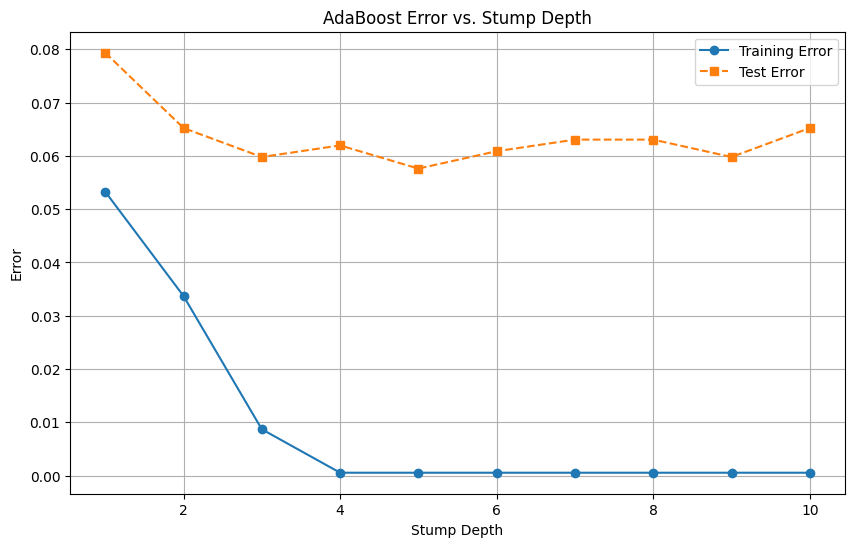

Minimum Test Error: 0.0576 at Stump Depth 5


In [34]:
# Define the range of stump depths
max_depths = np.linspace(1, 10, 10)  # From depth 1 to 10 in 10 steps

train_errors = []  # Training error
test_errors = []   # Test error

for depth in max_depths:
    # Initialize AdaBoost with decision stumps of varying depth
    base_estimator = DecisionTreeClassifier(max_depth=int(depth))
    adaboost = AdaBoostClassifier(
        estimator=base_estimator,
        random_state=42
    )
    
    # Fit the AdaBoost model to the training data
    adaboost.fit(X_train, y_train)
    
    # Calculate errors (1 - accuracy)
    train_error = 1 - accuracy_score(y_train, adaboost.predict(X_train))
    test_error = 1 - accuracy_score(y_test, adaboost.predict(X_test))
    
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_errors, marker='o', label="Training Error", linestyle='-')
plt.plot(max_depths, test_errors, marker='s', label="Test Error", linestyle='--')

plt.xlabel("Stump Depth")
plt.ylabel("Error")
plt.title("AdaBoost Error vs. Stump Depth")
plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('images/adaboost_error_vs_stump_depth.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Find the optimal stump depth
min_value, min_index = min((value, index) for index, value in enumerate(test_errors))
print(f"Minimum Test Error: {min_value:.4f} at Stump Depth {int(max_depths[min_index])}")

### Learning Curves for Adaboost

This section analyzes the learning curves for AdaBoost by varying the training set size. The goal is to understand how the model's performance changes as more data is used for training.

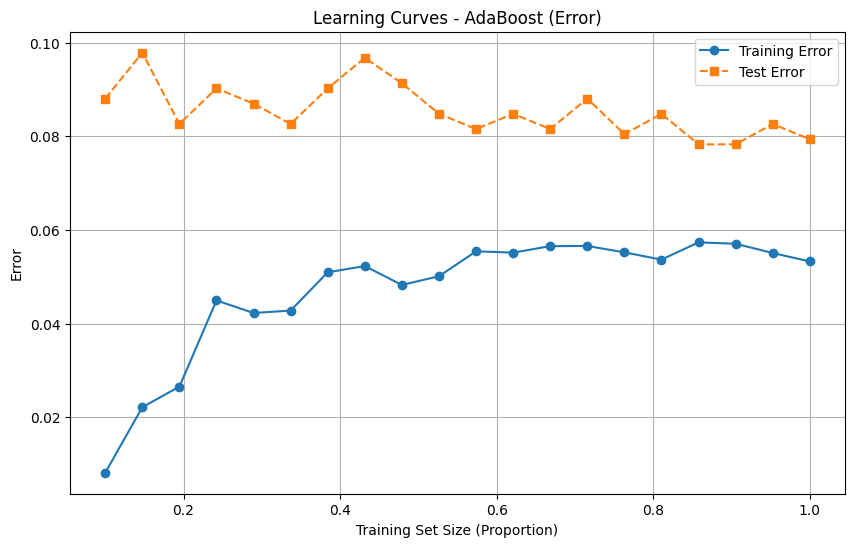

Minimum Test Error: 0.0783 at Training Size 0.86


In [35]:
# Create array of training set sizes
train_sizes = np.linspace(0.1, 1.0, 20)  # From 10% to 100% in 20 steps

train_errors = []  # Training error
test_errors = []   # Test error

for size in train_sizes:
    # Calculate how many samples to use for this training size
    n_samples = int(len(X_train) * size)
    
    # Use partial training data
    X_partial = X_train[:n_samples]
    y_partial = y_train[:n_samples]
    
    # Initialize and fit the AdaBoost model
    adaboost = AdaBoostClassifier(random_state=42)
    adaboost.fit(X_partial, y_partial)
    
    # Calculate errors (1 - accuracy)
    train_error = 1 - accuracy_score(y_partial, adaboost.predict(X_partial))
    test_error = 1 - accuracy_score(y_test, adaboost.predict(X_test))
    
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, marker='o', label="Training Error", linestyle='-')
plt.plot(train_sizes, test_errors, marker='s', label="Test Error", linestyle='--')

plt.xlabel("Training Set Size (Proportion)")
plt.ylabel("Error")
plt.title("Learning Curves - AdaBoost (Error)")
plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('images/adaboost_learning_curve.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Find the optimal training set size based on minimum test error
min_value, min_index = min((value, index) for index, value in enumerate(test_errors))
print(f"Minimum Test Error: {min_value:.4f} at Training Size {train_sizes[min_index]:.2f}")

---

## K-fold Cross Validation

### k-Fold Cross-Validation Implementation

This section implements k-fold cross-validation to tune the hyperparameters of random forests and AdaBoost. The optimal ensemble size is selected based on the minimum cross-validation error.

In [ ]:
# Function to compute 0-1 loss (misclassification error)
def compute_error(y_true, y_pred):
    return np.mean(y_true != y_pred)

# Function to implement k-fold cross-validation
def k_fold_cross_validation(X, y, k=5, model=None, random_state=None):
    """
    Perform k-fold cross-validation.

    Parameters:
    - X: Features (numpy array or pandas DataFrame).
    - y: Target (numpy array or pandas Series).
    - k: Number of folds (default is 5).
    - model: The machine learning model to evaluate.
    - random_state: Seed for reproducibility.

    Returns:
    - average_error: Average error across all folds.
    """
    if random_state is not None:
        np.random.seed(random_state)

    indices = np.arange(len(X))
    np.random.shuffle(indices)
    X_shuffled = X.iloc[indices]
    y_shuffled = y.iloc[indices]

    error_scores = []
    fold_size = len(X) // k

    for i in range(k):
        test_start = i * fold_size
        test_end = (i + 1) * fold_size if i < k - 1 else len(X)
        test_indices = indices[test_start:test_end]
        train_indices = np.concatenate([indices[:test_start], indices[test_end:]])

        X_train, X_test = X_shuffled.iloc[train_indices], X_shuffled.iloc[test_indices]
        y_train, y_test = y_shuffled.iloc[train_indices], y_shuffled.iloc[test_indices]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        error = compute_error(y_test, y_pred)
        error_scores.append(error)
        print(f"Fold {i + 1} error: {error:.4f}")

    average_error = np.mean(error_scores)
    return average_error

### K-fold Cross validation With Random Forests

This section uses **k-fold cross-validation** to evaluate the performance of a Random Forest classifier as the number of trees (ensemble size) varies. The goal is to find the optimal number of trees that minimizes the cross-validation error. Once the optimal ensemble size is determined, the final model is trained and evaluated on the test set.

Evaluating ensemble size: 10
Fold 1 error: 0.0557
Fold 2 error: 0.0503
Fold 3 error: 0.0543
Fold 4 error: 0.0516
Fold 5 error: 0.0516
Average error for 10 trees: 0.0527
Evaluating ensemble size: 20
Fold 1 error: 0.0503
Fold 2 error: 0.0462
Fold 3 error: 0.0530
Fold 4 error: 0.0462
Fold 5 error: 0.0503
Average error for 20 trees: 0.0492
Evaluating ensemble size: 30
Fold 1 error: 0.0476
Fold 2 error: 0.0503
Fold 3 error: 0.0462
Fold 4 error: 0.0435
Fold 5 error: 0.0476
Average error for 30 trees: 0.0470
Evaluating ensemble size: 40
Fold 1 error: 0.0476
Fold 2 error: 0.0421
Fold 3 error: 0.0476
Fold 4 error: 0.0448
Fold 5 error: 0.0489
Average error for 40 trees: 0.0462
Evaluating ensemble size: 50
Fold 1 error: 0.0462
Fold 2 error: 0.0448
Fold 3 error: 0.0435
Fold 4 error: 0.0476
Fold 5 error: 0.0516
Average error for 50 trees: 0.0467
Evaluating ensemble size: 60
Fold 1 error: 0.0489
Fold 2 error: 0.0435
Fold 3 error: 0.0448
Fold 4 error: 0.0421
Fold 5 error: 0.0543
Average error for 60 

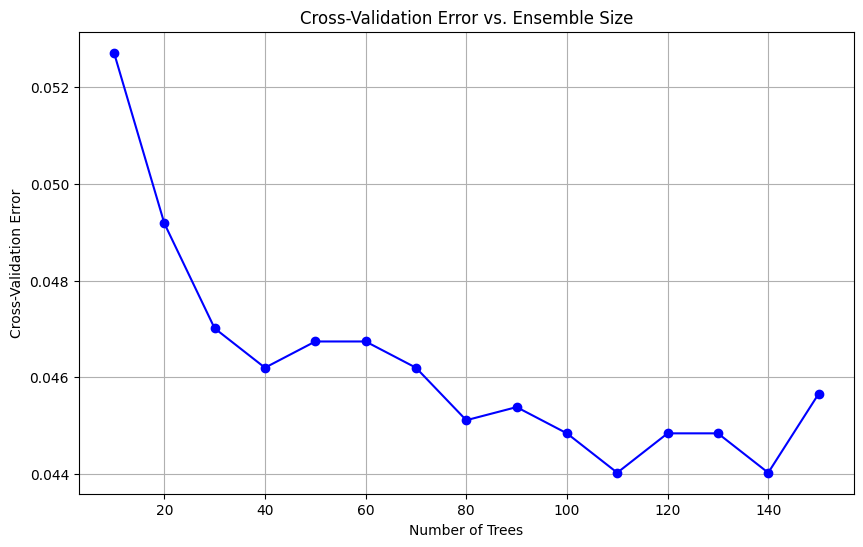

Best ensemble size: 110
Random Forest Test Error: 0.0641


In [39]:
# Define the range of ensemble sizes (number of trees)
ensemble_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

# Initialize a list to store average errors for each ensemble size
average_errors = []

# Perform k-fold cross-validation for each ensemble size
k = 5  # Number of folds
for n_trees in ensemble_sizes:
    print(f"Evaluating ensemble size: {n_trees}")

    # Initialize the Random Forest model with fixed hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_trees,
        max_features='sqrt',  # \(d' = \sqrt{d}\)
        criterion='gini',
        random_state=42
    )

    # Use your custom k-fold cross-validation function
    average_error = k_fold_cross_validation(X_train, y_train, k=k, model=model, random_state=42)
    average_errors.append(average_error)
    print(f"Average error for {n_trees} trees: {average_error:.4f}")

# Plot the cross-validation error vs. ensemble size
plt.figure(figsize=(10, 6))
plt.plot(ensemble_sizes, average_errors, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Error vs. Ensemble Size')
plt.xlabel('Number of Trees')
plt.ylabel('Cross-Validation Error')
plt.grid(True)

# Save the plot to a file
plt.savefig('images/random_forest_kfold.png', dpi=300, bbox_inches='tight')

plt.show()

best_ensemble_size = ensemble_sizes[np.argmin(average_errors)]
print(f"Best ensemble size: {best_ensemble_size}")

final_model = RandomForestClassifier(
    n_estimators=best_ensemble_size,
    max_features='sqrt',
    criterion='gini',
    random_state=42
)

final_model.fit(X_train, y_train)

# Evaluate Random Forest
y_pred_rf = final_model.predict(X_test)
rf_error = compute_error(y_test, y_pred_rf)
print(f"Random Forest Test Error: {rf_error:.4f}")

### k-Fold Cross-Validation with AdaBoost

This section uses k-fold cross-validation to tune the number of iterations (weak hypotheses) in AdaBoost. The optimal number of iterations is selected based on the minimum cross-validation error.

Evaluating ensemble size: 10
Fold 1 error: 0.0761
Fold 2 error: 0.0761
Fold 3 error: 0.0693
Fold 4 error: 0.0584
Fold 5 error: 0.0788
Average error for 10 stumps: 0.0717
Evaluating ensemble size: 20
Fold 1 error: 0.0639
Fold 2 error: 0.0761
Fold 3 error: 0.0666
Fold 4 error: 0.0530
Fold 5 error: 0.0720
Average error for 20 stumps: 0.0663
Evaluating ensemble size: 30
Fold 1 error: 0.0625
Fold 2 error: 0.0761
Fold 3 error: 0.0707
Fold 4 error: 0.0503
Fold 5 error: 0.0693
Average error for 30 stumps: 0.0658
Evaluating ensemble size: 40
Fold 1 error: 0.0503
Fold 2 error: 0.0747
Fold 3 error: 0.0666
Fold 4 error: 0.0516
Fold 5 error: 0.0557
Average error for 40 stumps: 0.0598
Evaluating ensemble size: 50
Fold 1 error: 0.0516
Fold 2 error: 0.0720
Fold 3 error: 0.0720
Fold 4 error: 0.0503
Fold 5 error: 0.0503
Average error for 50 stumps: 0.0592
Evaluating ensemble size: 60
Fold 1 error: 0.0516
Fold 2 error: 0.0747
Fold 3 error: 0.0584
Fold 4 error: 0.0503
Fold 5 error: 0.0557
Average error fo

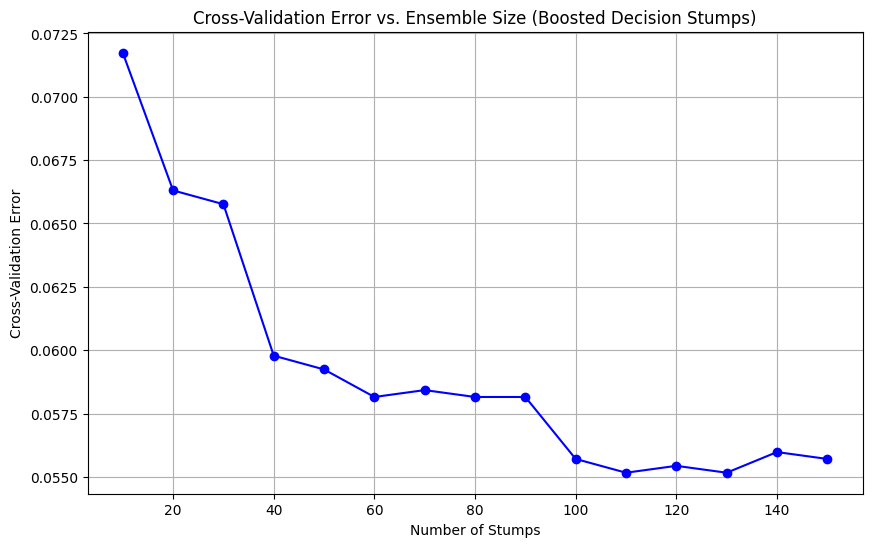

Best ensemble size: 110
Boosted Decision Stumps Test Error: 0.0815


In [46]:
# Define the range of ensemble sizes (number of stumps)
ensemble_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

# Initialize a list to store average errors for each ensemble size
average_errors = []

# Perform k-fold cross-validation for each ensemble size
k = 5  # Number of folds
for n_stumps in ensemble_sizes:
    print(f"Evaluating ensemble size: {n_stumps}")

    # Initialize the base estimator (decision stump)
    base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

    # Initialize the AdaBoost model with the base estimator
    model = AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=n_stumps,  # Number of stumps
        random_state=42
    )

    # Use your custom k-fold cross-validation function
    average_error = k_fold_cross_validation(X_train, y_train, k=k, model=model, random_state=42)
    average_errors.append(average_error)
    print(f"Average error for {n_stumps} stumps: {average_error:.4f}")

# Plot the cross-validation error vs. ensemble size
plt.figure(figsize=(10, 6))
plt.plot(ensemble_sizes, average_errors, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Error vs. Ensemble Size (Boosted Decision Stumps)')
plt.xlabel('Number of Stumps')
plt.ylabel('Cross-Validation Error')
plt.grid(True)

# Save the plot to a file
plt.savefig('images/adaboost_kfold.png', dpi=300, bbox_inches='tight')

plt.show()

# Select the best ensemble size
best_ensemble_size = ensemble_sizes[np.argmin(average_errors)]
print(f"Best ensemble size: {best_ensemble_size}")

# Train the final Boosted Decision Stumps model on the entire training set
final_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=best_ensemble_size,
    random_state=42
)
final_model.fit(X_train, y_train)

# Evaluate Boosted Decision Stumps on the test set
y_pred_bst = final_model.predict(X_test)
bst_error = compute_error(y_test, y_pred_bst)
print(f"Boosted Decision Stumps Test Error: {bst_error:.4f}")